# Scenario 3 Data Visualization

Connect to elastic search

In [18]:
import requests

def search_accounts(field, gte,lte):
    url = f"http://127.0.0.1:9090/mastodon/accounts/search/field/{field}?gte={gte}&lte={lte}"
    r = requests.get(url)
    return r.json()

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

Get the accounts created before 2016 (the year Mastodon established)

In [16]:
field = "created_at"
gte = '1900-01-01'
lte = "2016-10-10"
temp_data = search_accounts(field, gte,lte)
temp_account_df = pd.json_normalize(temp_data["data"])

In [17]:
len(temp_account_df)

342

Get the accounts created after 2016 (the year Mastodon established)

In [ ]:
field = "created_at"
gte = '2016-01-18'
lte = "2024-05-18"
data = search_accounts(field, gte,lte)

In [20]:
account_df = pd.json_normalize(data['data'])

In [21]:
len(account_df)

114090

Create single columns of year, month, day

In [22]:
account_df['created_year'] = account_df['created_at'].apply(lambda x: x[:4])
account_df['created_month'] = account_df['created_at'].apply(lambda x: x[5:7])
account_df['created_day'] = account_df['created_at'].apply(lambda x: x[8:10])

In [12]:
account_df[account_df['created_year'] == "2000"]

,created_at,followers_count,following_count,last_status_at,statuses_count,username,created_year,created_month,created_day
2897,2000-10-19T00:00:00.000Z,6,0,2024-04-22,11968,bureau42,2000,10,19
29364,2000-11-27T00:00:00.000Z,11,0,2024-04-30,282,houseofkyle.com,2000,11,27
107236,2000-07-10T00:00:00.000Z,3,0,2023-12-12,2648,blog,2000,07,10


In [6]:
account_df.head()

,created_at,followers_count,following_count,last_status_at,statuses_count,username,created_year,created_month,created_day
0,2023-04-03T00:00:00.000Z,1695,0,2024-05-06,474,LibreOfficeDE,2023,04,03
1,2019-10-03T00:00:00.000Z,273,513,2024-05-08,18252,thomas,2019,10,03
2,2023-07-05T00:00:00.000Z,30,28,2024-05-06,245,thesmutreport,2023,07,05
3,2024-04-14T00:00:00.000Z,0,0,2024-05-06,2,thesecretdew,2024,04,14
4,2023-07-02T00:00:00.000Z,270,175,2024-05-08,940,x_tof,2023,07,02


### Plot 1: 

Yearly new created accounts by year from 2014 (earliest year) to 2022 

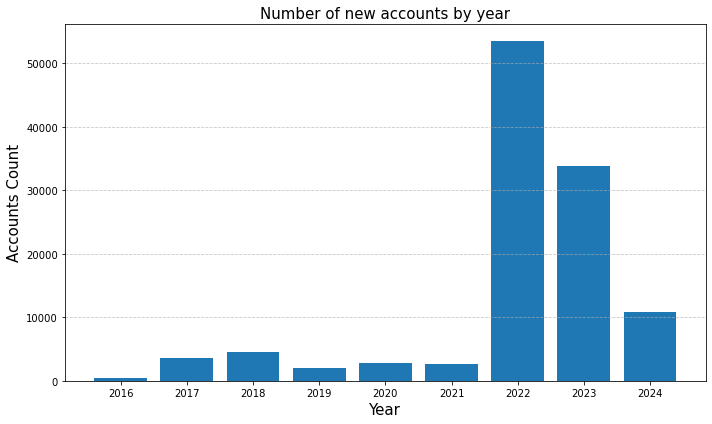

In [23]:
year_counts = account_df.groupby('created_year').size()
year_counts_sorted = year_counts.sort_index()

plt.figure(figsize=(10,6))
plt.bar(year_counts_sorted.index, year_counts_sorted.values)
plt.title("Number of new accounts by year", fontsize = 15)
plt.xlabel("Year", fontsize = 15)
plt.ylabel("Accounts Count", fontsize = 15)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

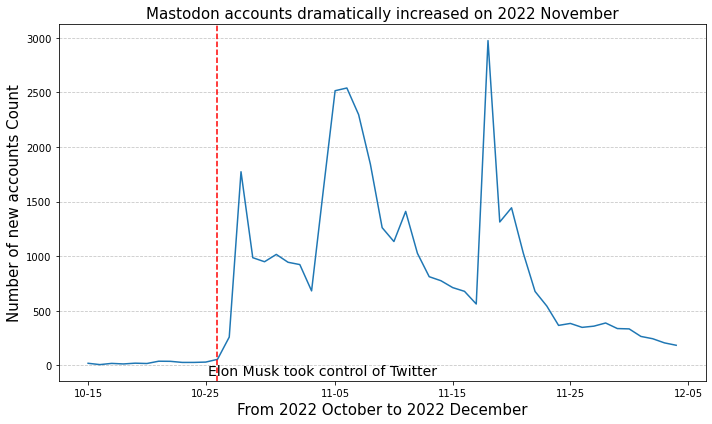

In [8]:
counts = account_df[(account_df['created_at'] >= "2022-10-15")&(account_df['created_at'] <= "2022-12-05")]
df_grouped = counts.groupby([pd.Grouper(key='created_month'), pd.Grouper(key='created_day')]).size().reset_index(name='count')
df_grouped['month_day'] = df_grouped['created_month'] +"-" + df_grouped['created_day']
plt.figure(figsize=(10,6))
plt.plot(df_grouped['month_day'], df_grouped['count'])
plt.title("Mastodon accounts dramatically increased on 2022 November", fontsize = 15)
plt.xlabel("From 2022 October to 2022 December", fontsize = 15)
plt.ylabel("Number of new accounts Count", fontsize = 15)
x_values_to_display = ['10-15', '10-25','11-05', '11-15','11-25' ,'12-05']
plt.xticks(x_values_to_display, x_values_to_display)
plt.axvline(x="10-26", color='r', linestyle='--')
plt.text(10.2, 10, 'Elon Musk took control of Twitter', verticalalignment='top', fontsize = 14)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
print("")

The average number of new accounts during 2022 October to December

In [26]:
len(account_df[(account_df['created_at'] >= "2022-10-15")&(account_df['created_at'] <= "2022-12-05")])/50

768.04

The average number of new accounts in the whole 2022 year

In [27]:
len(account_df[(account_df['created_at'] >= "2022-01-01")&(account_df['created_at'] < "2023-01-01")])/365

146.5041095890411

In [32]:
print("Total number of Mastodon accounts in AU: ", len(account_df))

Total number of Mastodon accounts in AU:  114120


### Statistic Info: 

Active Users in Mastodon

In [28]:
from datetime import datetime, timedelta
latest_active_day = account_df['last_status_at'].max()
seven_days_ago = datetime.strptime(latest_active_day, "%Y-%m-%d") - timedelta(days = 7)
seven_days_ago = seven_days_ago.strftime("%Y-%m-%d")
print("Number of active accounts within 7 days: ",len(account_df[(account_df['last_status_at'] > seven_days_ago )&(account_df['last_status_at']<=latest_active_day)]))
print("Percentage of active accounts within 7 days: " , "{:.0f}%".format(len(account_df[(account_df['last_status_at'] > seven_days_ago )&(account_df['last_status_at']<latest_active_day)])/len(account_df)*100))


Number of active accounts within 7 days:  22036
Percentage of active accounts within 7 days:  19%


In [29]:
month_ago = datetime.strptime(latest_active_day, "%Y-%m-%d") - timedelta(days = 30)
month_ago = month_ago.strftime("%Y-%m-%d")
print("Number of active accounts within 1 month: ",len(account_df[(account_df['last_status_at'] > month_ago )&(account_df['last_status_at']<=latest_active_day)]))
print("Percentage of active accounts within 1 month: ","{:.0f}%".format(len(account_df[(account_df['last_status_at'] > month_ago )&(account_df['last_status_at']<=latest_active_day)])/len(account_df)*100))

Number of active accounts within 1 month:  81960
Percentage of active accounts within 1 month:  72%


### Plot 2: Further analyze the active accounts (latest posts within 7 days)

Histogram of followers_count, following_count, statuses_count

Findings: The total number of Mastodon users having high followers and high followings are similar in AU. However, the number of accounts that having followers more than 2000 is higher than it in having followings.

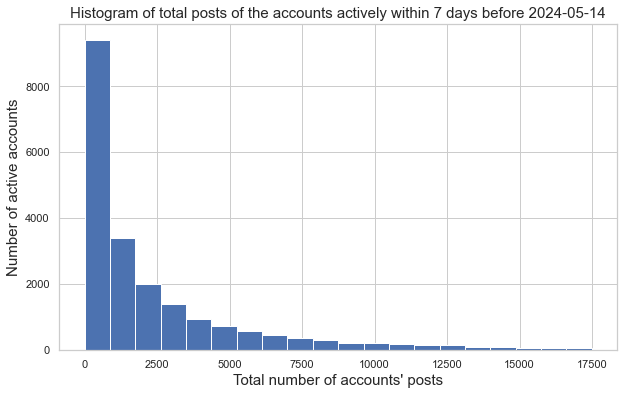

In [60]:
plt.figure(figsize=(10,6))
plt.hist(account_df[(account_df['last_status_at'] > seven_days_ago )&(account_df['last_status_at']<=latest_active_day)&(account_df['statuses_count']<17500)]['statuses_count'], bins=20)
plt.title("Histogram of total posts of the accounts actively within 7 days before 2024-05-14", fontsize = 15)
plt.xlabel("Total number of accounts' posts", fontsize = 15)
plt.ylabel("Number of active accounts", fontsize = 15)
plt.show()

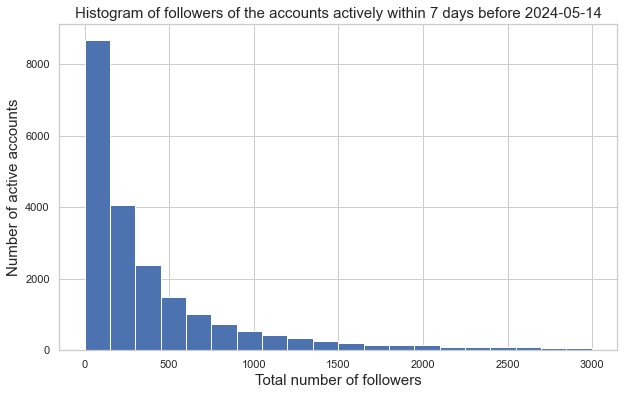

In [67]:
plt.figure(figsize=(10,6))
plt.hist(account_df[(account_df['last_status_at'] > seven_days_ago )&(account_df['last_status_at']<=latest_active_day)&(account_df['followers_count']<3000)]['followers_count'], bins=20)
plt.title("Histogram of followers of the accounts actively within 7 days before 2024-05-14", fontsize = 15)
plt.xlabel("Total number of followers", fontsize = 15)
plt.ylabel("Number of active accounts", fontsize = 15)
plt.show()

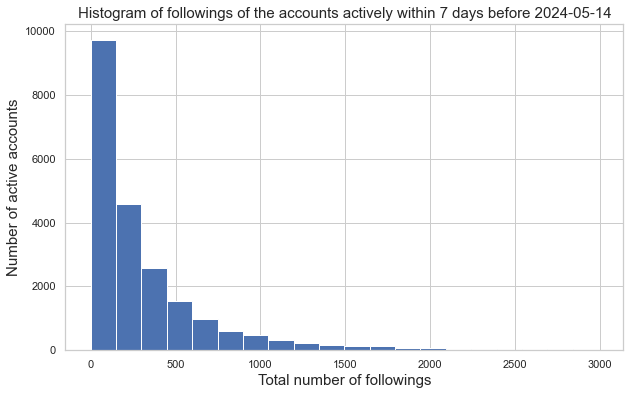

In [68]:
plt.figure(figsize=(10,6))
plt.hist(account_df[(account_df['last_status_at'] > seven_days_ago )&(account_df['last_status_at']<=latest_active_day)&(account_df['following_count']<3000)]['following_count'], bins=20)
plt.title("Histogram of followings of the accounts actively within 7 days before 2024-05-14", fontsize = 15)
plt.xlabel("Total number of followings", fontsize = 15)
plt.ylabel("Number of active accounts", fontsize = 15)
plt.show()

### Statistic Info: 
Whether followers_count, following_count, posts_count have postive relationship?

Findings: following_count and followers_count have slightly positive relationship. Surprisely, the correlation between the number of posts the user sent and its followings doesn't disclosed obvious relationship.

In [38]:
import seaborn as sns

# Compute correlation matrix
correlation_matrix = account_df[['followers_count', 'following_count', 'statuses_count']].corr()

# Print correlation matrix
print(correlation_matrix)

                 followers_count  following_count  statuses_count
followers_count         1.000000         0.021186        0.000316
following_count         0.021186         1.000000        0.006165
statuses_count          0.000316         0.006165        1.000000
